<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_methylchloride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methyl Chloride (CH₃Cl)**

**Methylchlorid (CH₃Cl)** oder **Chloromethan als Biosignature 🌱**
- Wird auf der Erde von bestimmten Pflanzen und Mikroorganismen produziert.
- Abiotisch nur schwer in relevanter Menge erzeugbar.

In [19]:
!pip install pyscf geometric py3Dmol -q
import numpy as np
import py3Dmol
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [20]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C   0.00000000   0.00000000   0.45520100
    Cl  0.00000000   0.00000000  -1.31979900
    H   0.00000000   1.02669100   0.82520000
    H   0.88910000  -0.51334500   0.82520000
    H  -0.88910000  -0.51334500   0.82520000
'''

# Name
molecule = 'Methyl Chloride (CH₃Cl)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = False  # Set false otherwise geometry optimization doesn't work
mol.spin = 0          # All 14 valence electrons are paired in bonding orbitals or as lone pairs on the chlorine atom.
                      # It is a closed-shell singlet molecule.
mol.build()

In [4]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Methyl Chloride (CH₃Cl) molecule symmetry:
 Top group: Cs
 Group name: Cs
--------------------


In [23]:
# 3D Molecular Geometry Visualization (takes molecule defined in `mol.build()`)
bohr_to_ang = 0.529177249                    # Convert coordinates from Bohr to Angstrom
xyz_string = f"{mol.natm}\n\n"               # Create XYZ string with proper formatting, two newlines after atom count
for i in range(mol.natm):
    coord = mol.atom_coord(i) * bohr_to_ang  # Convert to Angstrom
    xyz_string += f"{mol.atom_symbol(i)} {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n"
view = py3Dmol.view(width=600, height=400)   # Create viewer
view.addModel(xyz_string, 'xyz')             # Add molecule
view.setStyle({'stick': {'radius': 0.15},    # Apply styling
               'sphere': {'radius': 0.3}})
# Add labels for atoms
view.addPropertyLabels("atom", "", {'fontSize': 12, 'fontColor': 'black',
                                    'showBackground': True,
                                    'backgroundColor': 'white'})
view.setBackgroundColor('white')             # Set background and zoom
view.zoomTo()
print("- - - 3D Molecular Geometry Visualization can not be displayed in offline mode on Github - - -")
view  # # In Colab, the molecule will display automatically. If not displaying, you might need to explicitly call this for IPython widget

- - - 3D Molecular Geometry Visualization can not be displayed in offline mode on Github - - -


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Point Group Symmetry
* **Shape:** Tetrahedral arrangement of atoms around the central carbon, but with one substituent (Cl) different from the other three (H).
* **Symmetry Operations:** A principal three-fold rotation axis ($C_3$) that passes through the C-Cl bond. There are also three vertical mirror planes ($\sigma_v$) that each contain the C-Cl bond and one of the C-H bonds.
* **Point Group:** **$C_{3v}$**

In [14]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -499.117434968608


np.float64(-499.1174349686076)

converged SCF energy = -499.117434968608


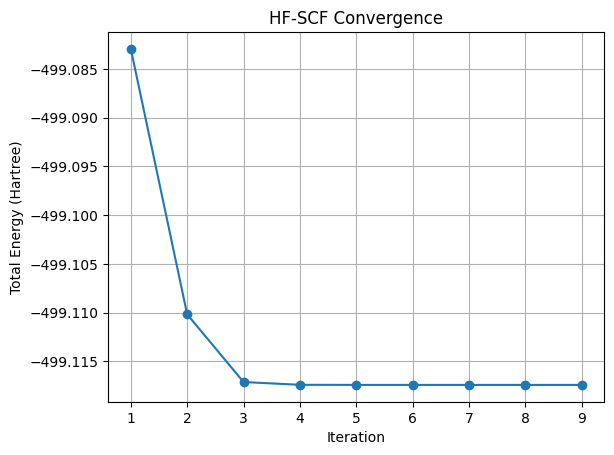

Ground state energy for Methyl Chloride (CH₃Cl): -499.11743496860794 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [15]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -500.128018932241


np.float64(-500.1280189322409)

In [16]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -499.117434968608
E(MP2) = -499.411697167029  E_corr = -0.294262198421294
E(SCS-MP2) = -499.409574674553  E_corr = -0.292139705945003
MP2 energy: -0.29426219842129403 Hartree


In [10]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -499.117434968607
E(CCSD) = -499.4405336599294  E_corr = -0.3230986913227464
CCSD(T) correction = -0.00732614640330549


In [11]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -499.117434968607
Excited State energies (eV)
[ 8.72946424  8.72947386 11.262438  ]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   A"      8.72946 eV    142.03 nm  f=0.0012
Excited State   2:   A'      8.72947 eV    142.03 nm  f=0.0012
Excited State   3:   A'     11.26244 eV    110.09 nm  f=0.0457


In [17]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-4d2b67f3-2af9-453c-9aef-2f39d12c528b.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.455201    0.000000  0.000000  0.000000
  Cl   0.000000   0.000000  -1.319799    0.000000  0.000000  0.000000
   H   0.000000   1.026691   0.825200    0.000000  0.000000  0.000000
   H   0.889100  -0.513345   0.825200   -0.000000  0.000000  0.000000
   H  -0.889100  -0.513345   0.825200    0.000000  0.000000  0.000000
converged SCF energy = -499.117434968607
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000178734    -0.0165754819
1 Cl     0.0000000000     0.0000004876     0.0030503916
2 H     0.0000000000     0.0021632051     0.0045119755
3 H     0.0018508066    -0.0010729097     0.0045065574
4 H    -0.0018508066    -0.0010729097     0.0045065574
----------------------------------------------
cycle 1: E = -499.117434969  dE = -499.117  norm(grad) = 0.

Step    0 : Gradient = 8.472e-03/1.658e-02 (rms/max) Energy = -499.1174349686
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.46598e-01 3.46636e-01 3.46636e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.471373    0.000000  0.000000  0.016172
  Cl   0.000000   0.000001  -1.309353    0.000000  0.000001  0.010446
   H  -0.000000   1.029637   0.816326   -0.000000  0.002946 -0.008874
   H   0.891695  -0.514819   0.816328    0.002595 -0.001474 -0.008872
   H  -0.891695  -0.514819   0.816328   -0.002595 -0.001474 -0.008872
converged SCF energy = -499.117804690061
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000025972    -0.0053792225
1 Cl     0.0000000000     0.0000000890     0.0040163593
2 H     0.0000000000     0.0000957476     0.0004535836
3 H     0.0000857352    -0.0000492169     0.0004546398
4 H    -0.0000857352    -0.0000492169     0.0004546398
----------------------------------------------
cycle 2: E = -499.11780469  dE = -0.000369721  norm(grad) =

Step    1 : Displace = 1.125e-02/1.617e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 3.024e-03/5.379e-03 (rms/max) E (change) = -499.1178046901 (-3.697e-04) Quality = 1.178
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.46611e-01 3.46636e-01 3.68856e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.477004    0.000000 -0.000000  0.005631
  Cl  -0.000000  -0.000000  -1.313422   -0.000000 -0.000001 -0.004069
   H  -0.000000   1.030612   0.815807   -0.000000  0.000975 -0.000519
   H   0.892539  -0.515305   0.815807    0.000844 -0.000487 -0.000522
   H  -0.892539  -0.515305   0.815807   -0.000844 -0.000487 -0.000522
converged SCF energy = -499.117852402334
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000014498    -0.0002276727
1 Cl     0.0000000000    -0.0000000901     0.0004302984
2 H    -0.0000000000    -0.0002969549    -0.0000677356
3 H    -0.0002553878     0.0001477976    -0.0000674451
4 H     0.0002553878     0.0001477976    -0.0000674451
----------------------------------------------
cycle 3: E = -499.117852402  dE = -4.77123e-05  norm(grad) 

Step    2 : Displace = 3.223e-03/5.631e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 3.203e-04/4.303e-04 (rms/max) E (change) = -499.1178524023 (-4.771e-05) Quality = 1.074
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.46611e-01 3.46636e-01 3.62469e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.477483   -0.000000 -0.000000  0.000479
  Cl  -0.000000   0.000000  -1.313999   -0.000000  0.000000 -0.000577
   H  -0.000000   1.031204   0.815839    0.000000  0.000592  0.000032
   H   0.893049  -0.515602   0.815839    0.000510 -0.000296  0.000033
   H  -0.893049  -0.515602   0.815839   -0.000510 -0.000296  0.000033
converged SCF energy = -499.117853209639
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000002130    -0.0000148497
1 Cl    -0.0000000000     0.0000000082     0.0000312354
2 H    -0.0000000000     0.0000336626    -0.0000054259
3 H     0.0000290153    -0.0000167289    -0.0000054799
4 H    -0.0000290153    -0.0000167289    -0.0000054799
----------------------------------------------
cycle 4: E = -499.11785321  dE = -8.07305e-07  norm(grad) =

Step    3 : Displace = 5.676e-04/5.930e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.054e-05/3.410e-05 (rms/max) E (change) = -499.1178532096 (-8.073e-07) Quality = 0.963
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.46611e-01 3.46636e-01 3.62469e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 7.097 seconds


[[ 1.49225697e-14  1.64516257e-07  9.02311539e-01]
 [-5.64363026e-14  6.98474975e-08 -2.48309832e+00]
 [-1.21699594e-13  1.94869304e+00  1.54171301e+00]
 [ 1.68761723e+00 -9.74345691e-01  1.54171317e+00]
 [-1.68761723e+00 -9.74345691e-01  1.54171317e+00]]


converged SCF energy = -499.117434968607


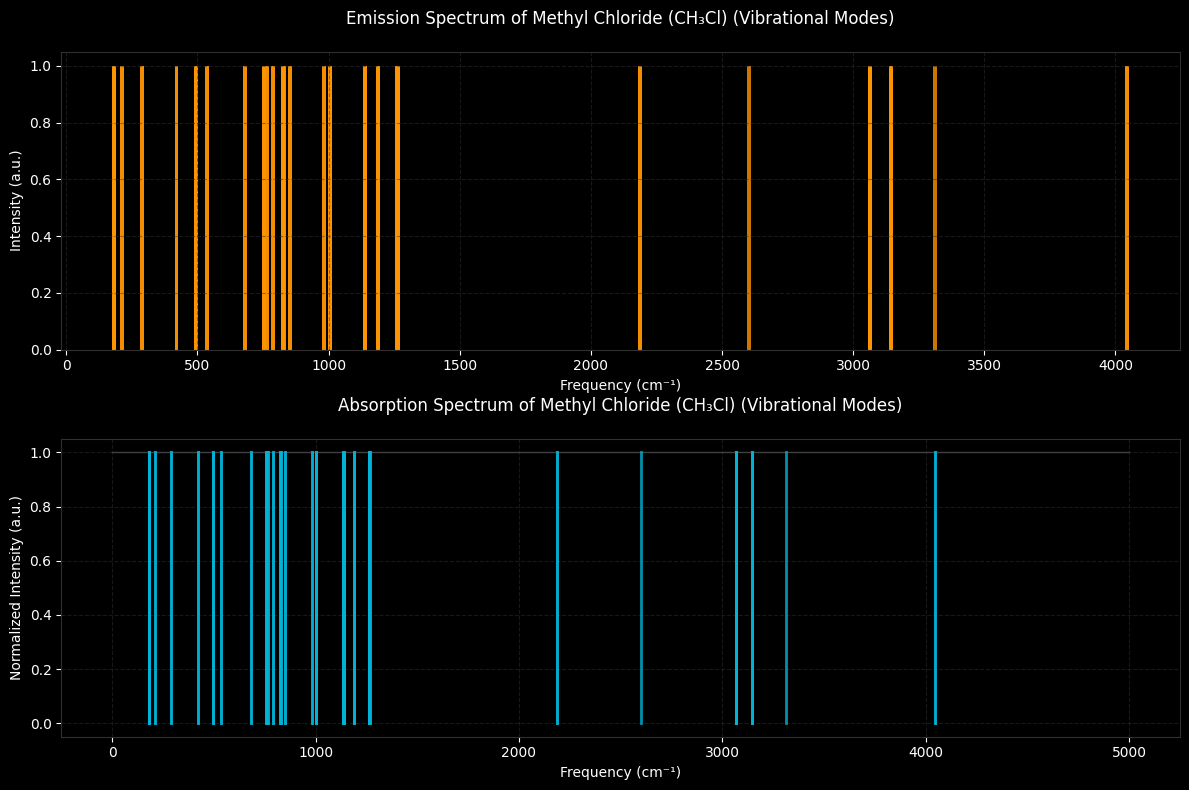

In [18]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()